#Implementação e análise empírica do algoritmo de Karger

##Dupla
Edgard Henrique Coelho Tavares da Silva - 20210027041

Gabriel Vieira Coutinho - 20210139075

##Algoritmo de Karger

Corte mínimo:  dado um grafo simples G, obter o menor número de arestas cuja remoção desconecta o grafo


Algoritmo de Karger consiste em escolher uma aresta aleatoriamente de modo uniforme e a contrai. Repete até sobrar apenas 2 vértices, gerando assim um multigrafo, que é um grafo que possui multiplas arestas entre quaisquer dois vertices

In [ ]:
import random
import matplotlib.pyplot as plt

def read_file(grafo):
        with open(grafo, 'r') as file:
            num_vertices = int(file.readline().strip())
            matriz = []
            vizinhos = [[] for _ in range(num_vertices)]
            arestas = []

            for _ in range(num_vertices):
                line = file.readline().strip().split()
                matriz.append([int(x) for x in line])

            for i in range(num_vertices):
                for j in range(num_vertices):
                    if matriz[i][j] == 1:
                        if (i,j) not in arestas and i < j:
                            arestas.append((i,j))

            vertices = [x for x in range(num_vertices)]

        return vertices, num_vertices, arestas

def remove_items(test_list, item):
    # remove the item for all its occurrences
    c = test_list.count(item)
    for i in range(c):
        test_list.remove(item)
    return test_list



def merge(aresta, num_vertices, arestas, vertices, SN):
  #Caso 1: os dois vertices são apenas vertices
  if aresta[0] not in SN.keys() and aresta[1] not in SN.keys():
    #Criando SuperNode e removendo vertices
    for i in range(len(aresta)):
      vertices.remove(aresta[i])
    vertices.append(num_vertices)
    SN[num_vertices ] = [*aresta]
    num_vertices = num_vertices + 1

    #Removendo a aresta do merge
    aresta_invertida = (aresta[1], aresta[0])
    remove_items(arestas, aresta)
    remove_items(arestas, aresta_invertida)

    remove_list = []

    for i in arestas:
      if i[0] in aresta:
        arestas.append((i[1], vertices[-1]))
        remove_list.append(i)
      elif i[1] in aresta:
        arestas.append((i[0], vertices[-1]))
        remove_list.append(i)

    for i in remove_list:
      remove_items(arestas, i)

  #Caso 2: os dois vertices são SuperNodes
  elif aresta[0] in SN.keys() and aresta[1] in SN.keys():
    #Adicionando o conteudo de um SuperNode no outro e deletando um deles
    SN[aresta[1]].extend(SN[aresta[0]])
    vertices.remove(aresta[0])
    del SN[aresta[0]]


    #Removendo a aresta do merge
    aresta_invertida = (aresta[1], aresta[0])
    remove_items(arestas, aresta)
    remove_items(arestas, aresta_invertida)

    remove_list = []
    for i in arestas:
      if i[0] == aresta[0]:
        arestas.append((aresta[1], i[1]))
        remove_list.append(i)
      if i[1] == aresta[0]:
        arestas.append((i[0], aresta[1]))
        remove_list.append(i)

    for i in remove_list:
      remove_items(arestas, i)

  #Caso 3: o segundo vertice é um SuperNode
  else:
    SN[aresta[1]].append(aresta[0])
    vertices.remove(aresta[0])

    #Removendo a aresta do merge
    aresta_invertida = (aresta[1], aresta[0])
    remove_items(arestas, aresta)
    remove_items(arestas, aresta_invertida)

    remove_list = []
    for i in arestas:
      if i[0] == aresta[0]:
        arestas.append((i[1], aresta[1]))
        remove_list.append(i)
      if i[1] == aresta[0]:
        arestas.append((i[0], aresta[1]))
        remove_list.append(i)

    for i in remove_list:
      remove_items(arestas, i)


  arestas.sort
  return num_vertices, arestas, vertices, SN

def karger(filepath):
  vertices, num_vertices, arestas = read_file(filepath)
  SN = {}
  while len(vertices) > 2:
    aresta = random.choice(arestas)
    num_vertices, arestas, vertices, SN = merge(aresta, num_vertices, arestas, vertices, SN)
  return len(arestas)

def ler_corte_minimo(arquivo):
    with open(arquivo, 'r') as f:
        corte_minimo = int(f.readline().strip())  # Lê o valor do corte mínimo
    return corte_minimo

def min_cut(filepathin, filepathout, iters):
  corte_minimo = 1000
  for i in range(iters):
    corte_atual = karger(filepathin)
    if corte_atual < corte_minimo:
      corte_minimo = corte_atual
  return corte_minimo

def grafico(filepathin, filepathout):
  # Configuração do experimento
  lista_n_iter = [10, 25, 50, 75]
  n_exec = 1000
  probabilidades = {}
  corte_minimo_conhecido = ler_corte_minimo(filepathout)

  for n_iter in lista_n_iter:
    acertos = 0
    for i in range(n_exec):
      corte = min_cut(filepathin, filepathout, n_iter)
      if corte == corte_minimo_conhecido:
        acertos += 1
    prob = acertos / n_exec
    probabilidades[n_iter] = prob
    print(f'Para {n_iter} iterações, a probabilidade de encontrar o corte mínimo é de {prob:.4f}')

  # Plotar os resultados
  plt.figure(figsize=(10, 6))
  plt.plot(lista_n_iter, list(probabilidades.values()), 'b--o')
  plt.xticks(lista_n_iter)
  plt.ylim([-0.1, 1.1])
  plt.xlabel('Número de Iterações')
  plt.ylabel('Probabilidade de Encontrar o Corte Mínimo')
  plt.title('Probabilidade de Encontrar o Corte Mínimo pelo Número de Iterações no Algoritmo de Karger')
  plt.grid(True)
  plt.show()

Para 10 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 25 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 50 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 75 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000


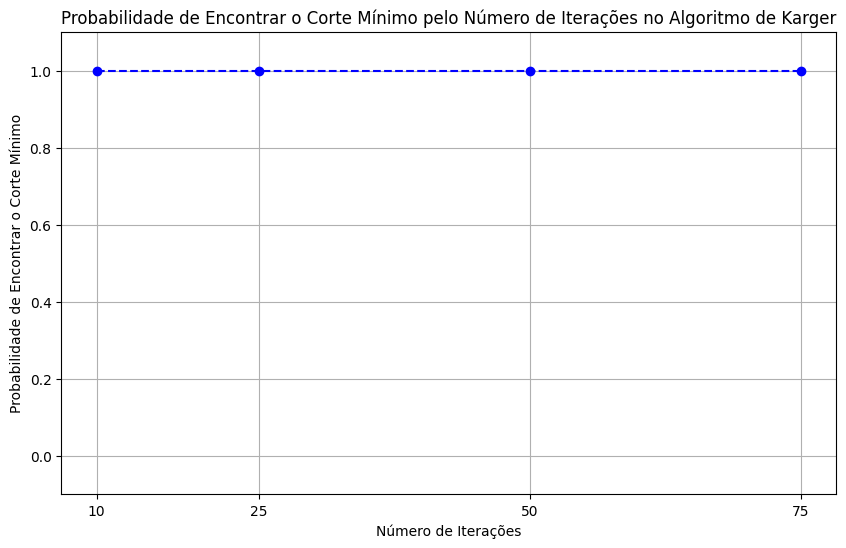

In [ ]:
grafico('/content/graph_type1_1', '/content/graph_type1_1(1)')

Para 10 iterações, a probabilidade de encontrar o corte mínimo é de 0.9990
Para 25 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 50 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 75 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000


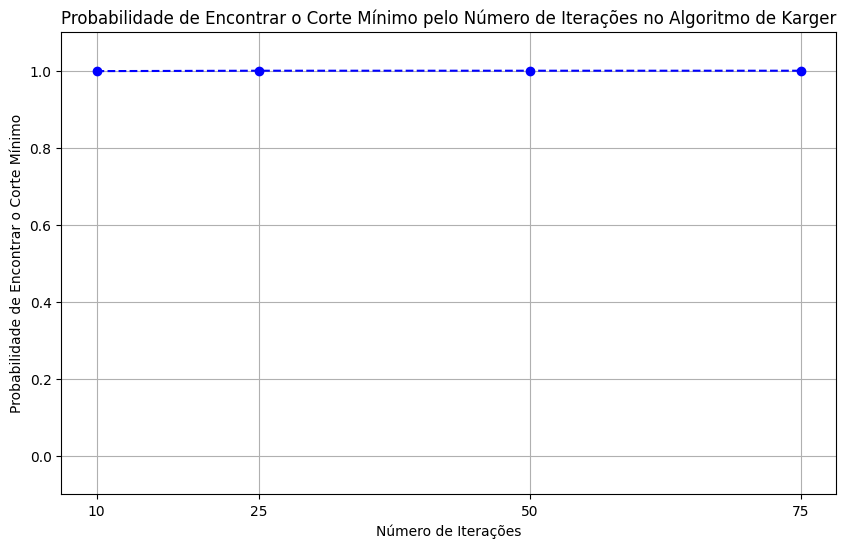

In [ ]:
grafico('/content/graph_type1_2', '/content/graph_type1_2(1)')

Para 10 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 25 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 50 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 75 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000


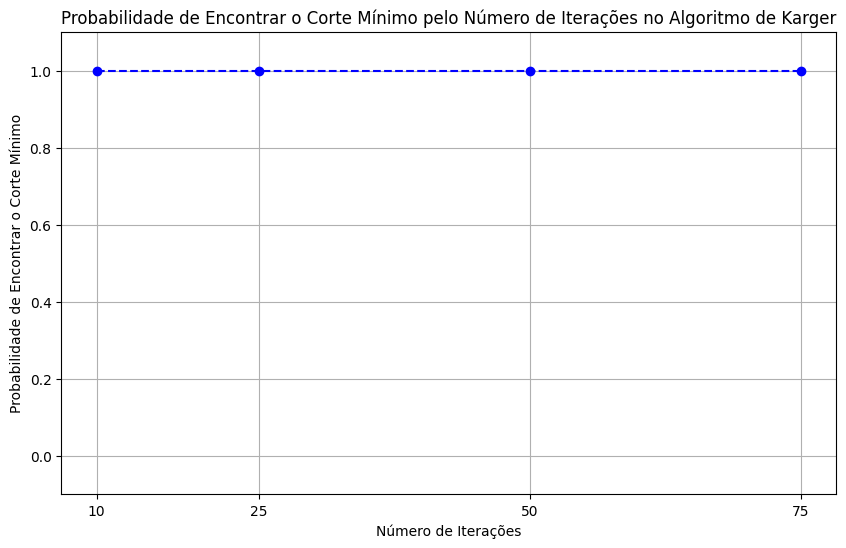

In [ ]:
grafico('/content/graph_type1_3', '/content/graph_type1_3(1)')

Para 10 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 25 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 50 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 75 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000


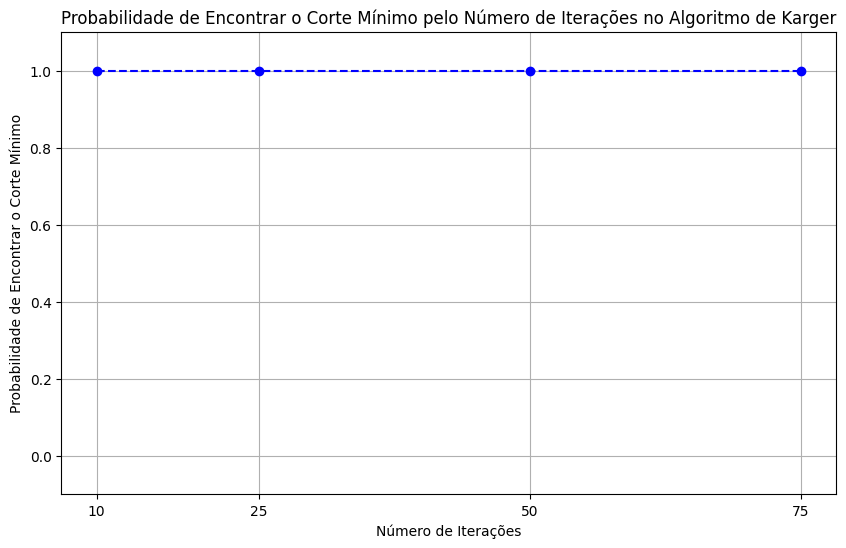

In [ ]:
grafico('/content/graph_type2_1', '/content/graph_type2_1(1)')

Para 10 iterações, a probabilidade de encontrar o corte mínimo é de 0.6600
Para 25 iterações, a probabilidade de encontrar o corte mínimo é de 0.9260
Para 50 iterações, a probabilidade de encontrar o corte mínimo é de 0.9980
Para 75 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000


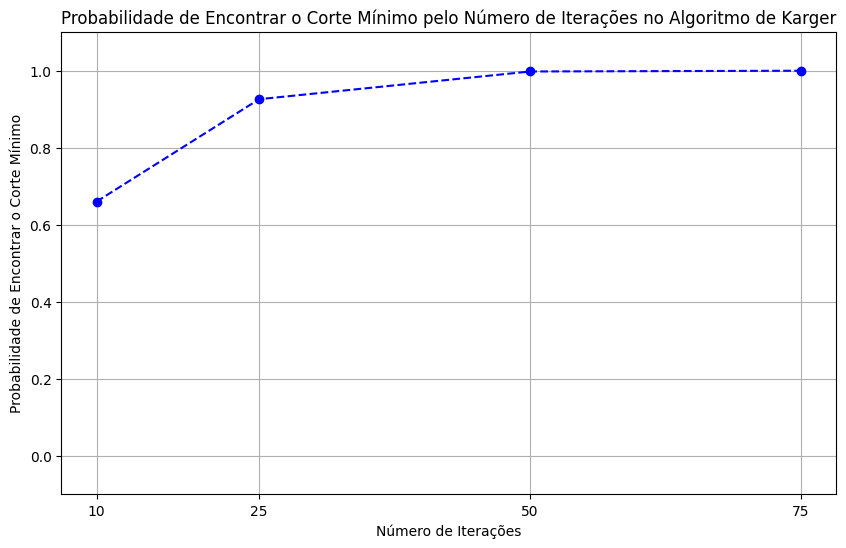

In [ ]:
grafico('/content/graph_type2_2', '/content/graph_type2_2(1)')

Para 10 iterações, a probabilidade de encontrar o corte mínimo é de 0.8460
Para 25 iterações, a probabilidade de encontrar o corte mínimo é de 0.9940
Para 50 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000
Para 75 iterações, a probabilidade de encontrar o corte mínimo é de 1.0000


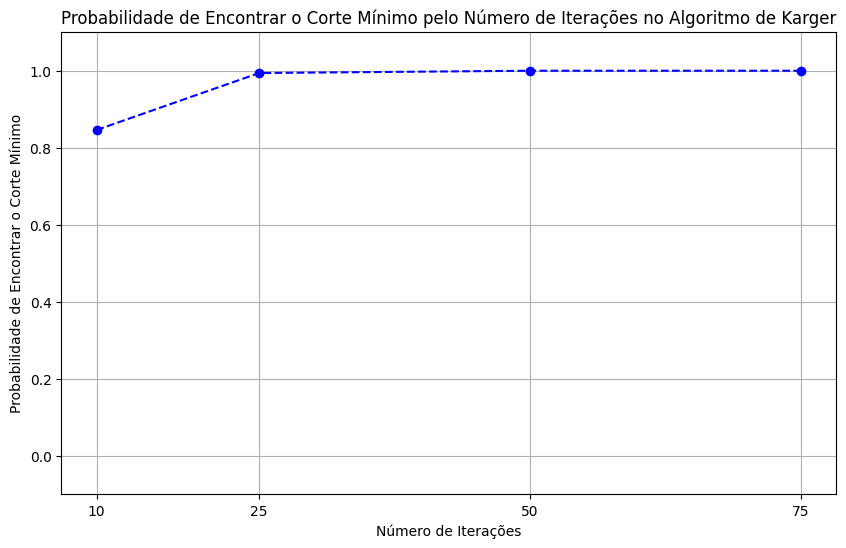

In [ ]:
grafico('/content/graph_type2_3', '/content/graph_type2_3(1)')

##Algoritmo ingênuo

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
def lista_adj(arquivo):
    with open(arquivo, 'r') as f:
        n = int(f.readline().strip())  # Lê o número de vértices
        matriz_adj = [list(map(int, linha.split())) for linha in f.readlines()]

        # Converte a matriz de adjacência em lista de adjacência
        lista_adj = [[] for _ in range(n)]  # Cria uma lista de listas para cada vértice
        for i in range(n):
            for j in range(n):
                # Se o elemento da matriz indica uma aresta, adiciona o vértice à lista
                if matriz_adj[i][j] == 1:
                    lista_adj[i].append(j)
    return lista_adj

In [ ]:
def ler_corte_minimo(arquivo):
    with open(arquivo, 'r') as f:
        corte_minimo = int(f.readline().strip())  # Lê o valor do corte mínimo
    return corte_minimo

In [ ]:
def calcular_qtd_arestas(subgrupo_a, subgrupo_b, grafo):
    arestas = 0
    for vertice_a in subgrupo_a:
        for vertice_b in subgrupo_b:
            if vertice_b in grafo[vertice_a]:
                arestas += 1
    return arestas

In [ ]:
def exec_naive(grafo, corte_minimo, n_iter, n_exec):
    num_vertices = len(grafo)
    melhor_solucao = float('inf')
    iteracoes = []
    probabilidades = []

    for num_iteracoes in n_iter:
        quantidade_acertos = 0

        for execucao in range(n_exec):
            m_arestas = float('inf')

            for iteracao in range(num_iteracoes):
                lista_vertices = list(range(num_vertices))
                random.shuffle(lista_vertices)
                divisao = random.randint(1, num_vertices - 1)
                subgrupo_a = lista_vertices[:divisao]
                subgrupo_b = lista_vertices[divisao:]

                arestas = calcular_qtd_arestas(subgrupo_a, subgrupo_b, grafo)

                if arestas < m_arestas:
                    m_arestas = arestas

            if m_arestas == corte_minimo:
                quantidade_acertos += 1

            if m_arestas < melhor_solucao:
                melhor_solucao = m_arestas

        porcentagem_acertos = quantidade_acertos / n_exec
        iteracoes.append(num_iteracoes)
        probabilidades.append(porcentagem_acertos)

    return iteracoes, probabilidades

In [ ]:
grafo = lista_adj("/content/graph_type2_2")
true_min_cut = ler_corte_minimo("/content/graph_type2_2(1)")
n_iter_list = [1, 5, 10, 25, 50, 100]
n_exec = 10000
iteracoes, probabilidades = exec_naive(grafo, true_min_cut,n_iter_list, n_exec)

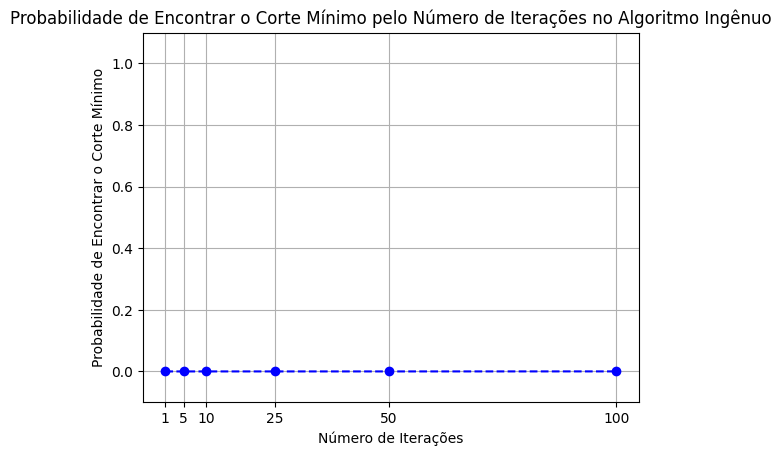

In [ ]:
plt.plot(iteracoes, probabilidades, marker='o', linestyle='--', color='b')
plt.ylim([-0.1, 1.1])
plt.xticks(n_iter_list)
plt.xlabel('Número de Iterações')
plt.ylabel('Probabilidade de Encontrar o Corte Mínimo')
plt.title('Probabilidade de Encontrar o Corte Mínimo pelo Número de Iterações no Algoritmo Ingênuo')
plt.grid(True)
plt.show()

#Relatório

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def compare_methods(graph_filepath, result_filepath, n_iter_list=[10, 25, 50, 75], n_exec=10000):
    min_cut_known = ler_corte_minimo(result_filepath)

    probabilities_karger = {}
    probabilities_naive = {}

    for n_iter in n_iter_list:
        acertos = 0
        for i in range(n_exec):
            corte = min_cut(graph_filepath, result_filepath, n_iter)  # Supondo que essa função está corretamente definida e funciona como esperado
            if corte == min_cut_known:
                acertos += 1
        probabilities_karger[n_iter] = acertos / n_exec

    grafo = lista_adj(graph_filepath)  # Supondo que essa função lê o grafo corretamente
    # Chamada correta para exec_naive
    iteracoes, probabilidades = exec_naive(grafo, min_cut_known, n_iter_list, n_exec)
    for i, prob in zip(iteracoes, probabilidades):
        probabilities_naive[i] = prob

    plt.figure(figsize=(10, 6))
    plt.plot(list(probabilities_karger.keys()), list(probabilities_karger.values()), 'b-o', label='Karger')
    plt.plot(list(probabilities_naive.keys()), list(probabilities_naive.values()), 'r--o', label='Naive')
    plt.xticks(n_iter_list)
    plt.ylim([-0.1, 1.1])
    plt.xlabel('Número de iterações')
    plt.ylabel('Probabilidade de achar o corte mínimo')
    plt.title('Comparação entre Karger e Naive')
    plt.legend()
    plt.grid(True)
    plt.show()

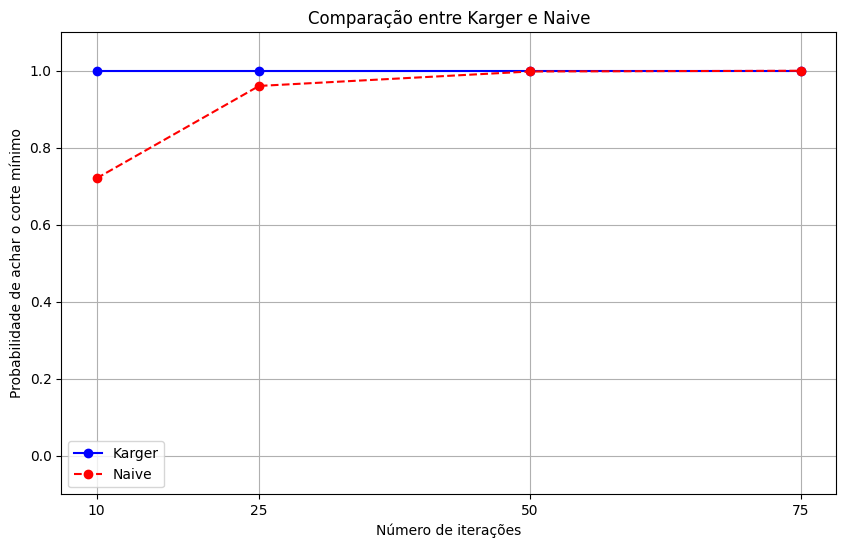

In [ ]:
compare_methods("/content/graph_type1_1", "/content/graph_type1_1(1)", n_iter_list=[10, 25, 50, 75])

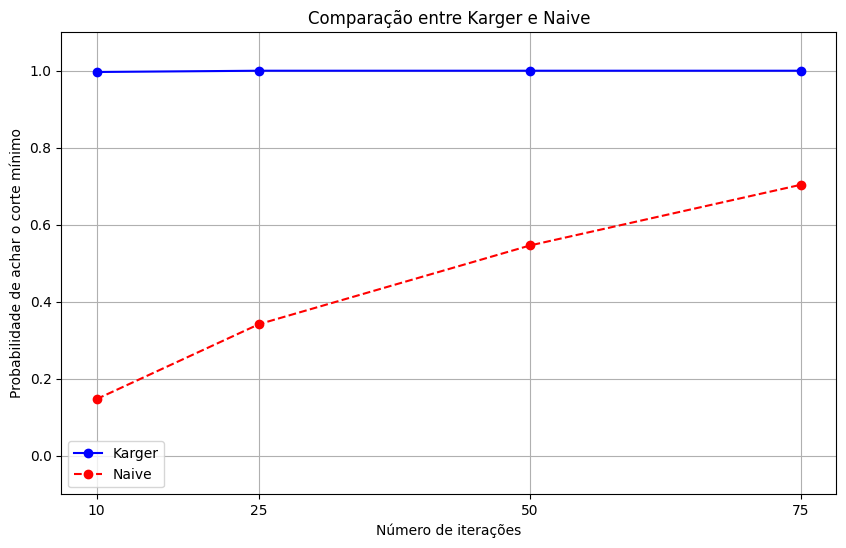

In [ ]:
compare_methods("/content/graph_type1_2", "/content/graph_type1_2(1)", n_iter_list=[10, 25, 50, 75])

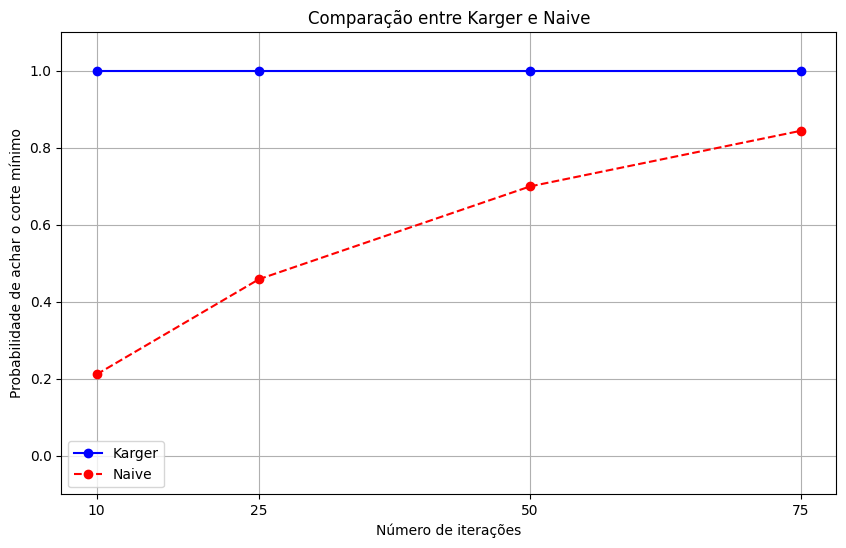

In [ ]:
compare_methods("/content/graph_type1_3", "/content/graph_type1_3(1)", n_iter_list=[10, 25, 50, 75])

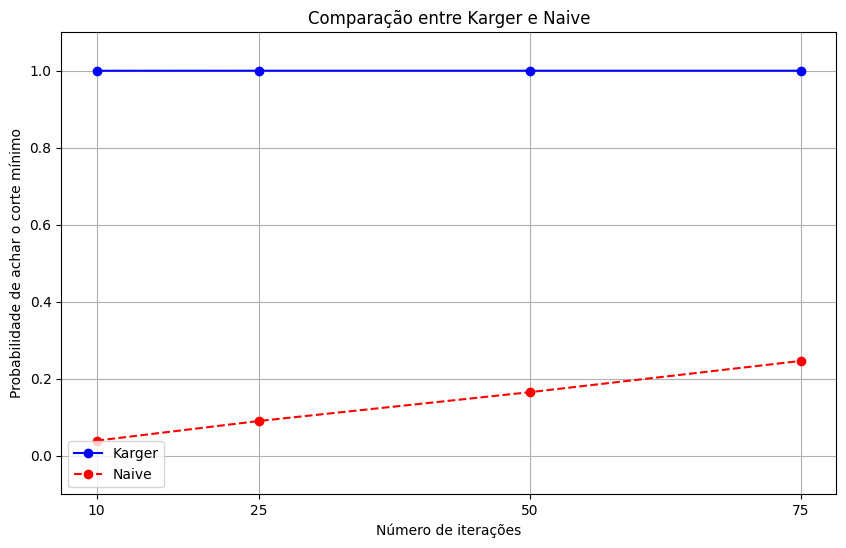

In [ ]:
compare_methods("/content/graph_type2_1", "/content/graph_type2_1(1)", n_iter_list=[10, 25, 50, 75])

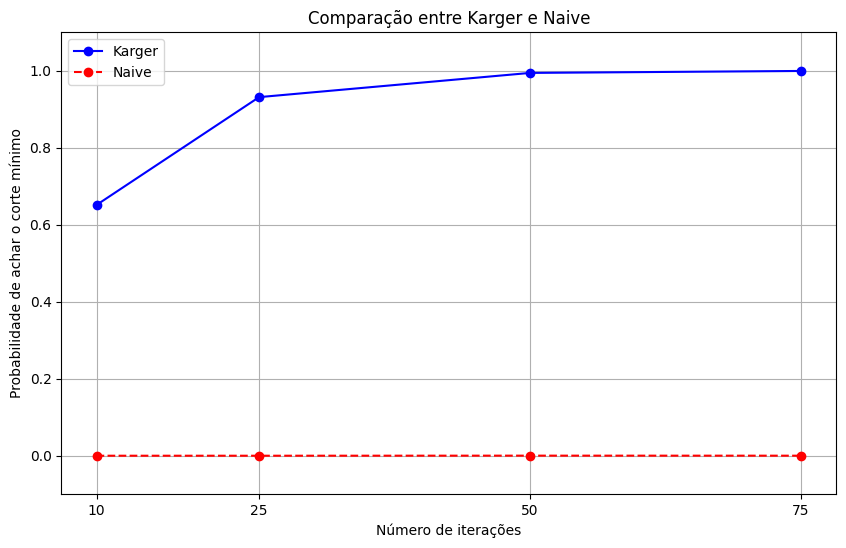

In [ ]:
compare_methods("/content/graph_type2_2", "/content/graph_type2_2(1)", n_iter_list=[10, 25, 50, 75])

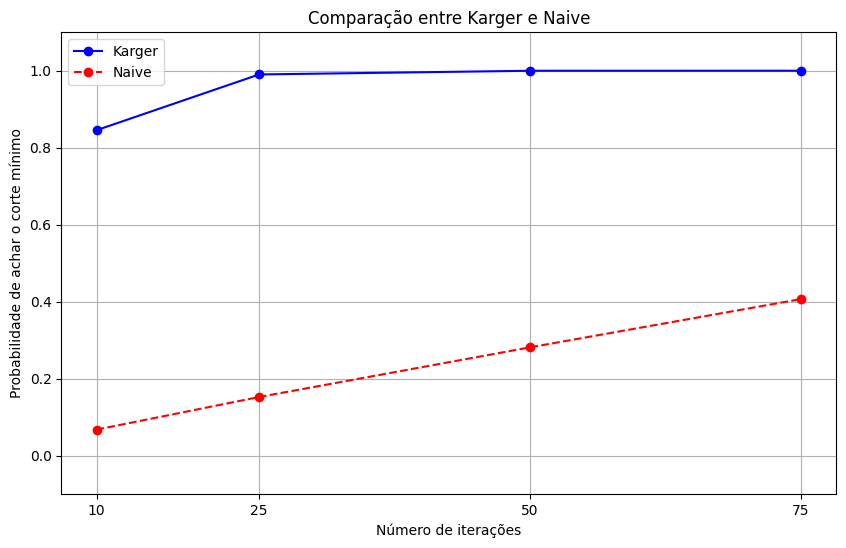

In [ ]:
compare_methods("/content/graph_type2_3", "/content/graph_type2_3(1)", n_iter_list=[10, 25, 50, 75])